#1. PERKENALAN

In [1]:
'''
Nama  : Rugaya Muksin BSA
Batch : 006
Phase : 1
GC    : 4

Dataset yang akan digunakan merangkum perilaku penggunaan sekitar 9000 pemegang 
kartu kredit aktif selama 6 bulan terakhir.

Clustering dilakukan terhadap pelanggan untuk menentukan strategi pemasaran 
yang tepat.

'''

'\nNama  : Rugaya Muksin BSA\nBatch : 006\nPhase : 1\nGC    : 4\n\nDataset yang akan digunakan merangkum perilaku penggunaan sekitar 9000 pemegang \nkartu kredit aktif selama 6 bulan terakhir.\n\nClustering dilakukan terhadap pelanggan untuk menentukan strategi pemasaran \nyang tepat.\n\n'

#2. IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

#3. DATA LOADING

In [3]:
ori_df = pd.read_csv('CC GENERAL.csv')
df = ori_df.copy()
df.shape

(8950, 18)

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#4. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dari output diatas, terlihat bahwa:
*   Terdapat missing value pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS
*   Terdapat satu kolom dengan fitur kategorik yaitu CUST_ID


###4.1 DROP KOLOM YANG TIDAK PENTING

Saya memutuskan untuk drop CUST_ID, menurut saya kolom ini tidak merepresentasikan suatu informasi yang penting untuk clustering nanti.

In [6]:
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

###4.2 MISSING VALUE

In [7]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(df.isnull().sum(), columns=['Missing values'])
mv['% missing_values'] = (mv/len(df)).round(2)*100
mv

,Missing values,% missing_values
BALANCE,0,0.0
BALANCE_FREQUENCY,0,0.0
PURCHASES,0,0.0
ONEOFF_PURCHASES,0,0.0
INSTALLMENTS_PURCHASES,0,0.0
CASH_ADVANCE,0,0.0
PURCHASES_FREQUENCY,0,0.0
ONEOFF_PURCHASES_FREQUENCY,0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0
CASH_ADVANCE_FREQUENCY,0,0.0


Dari output diatas, terlihat bahwa:


*   Missing value pada kolom CREDIT_LIMIT hanya terdapat pada 1 baris dari keseluruhan dataset
*   Missing value pada kolom MINIMUM_PAYMENTS terdapat pada 313 data dengan presentase 3% dari keseluruhan dataset



**Saya memutuskan untuk drop baris yang mengandung missing value, dikarenakan pengisian nilai pada CREDIT_LIMIT dan MINIMUM_PAYMENTS dengan mean/median atau menggunakan pengisian nilai tertentu secara manual one by one, menurut saya bukanlah treatment yang tepat karena kita akan melakukan pengelompokkan sehingga lebih tepat jika pengelompokkan hanya dilakukan pada real data.**

In [8]:
rows_without_missing_data = df.dropna()

In [9]:
df = rows_without_missing_data
df.shape

(8636, 17)

Setelah di drop baris/data yang mengandung missing value, sebanyak 8636 data real yang akan digunakan untuk clustering

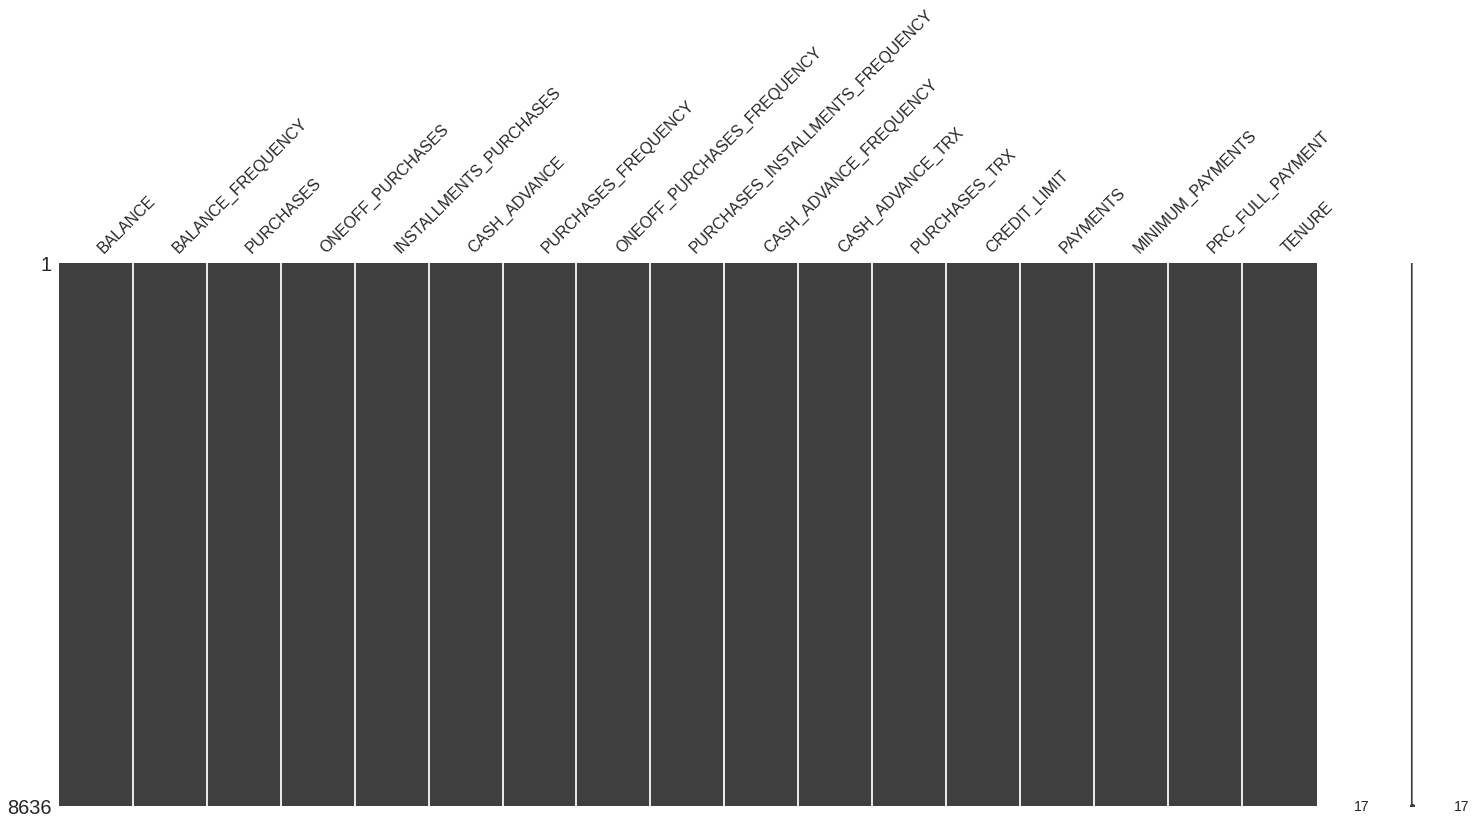

In [10]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

#5. EDA

In [11]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
'''
BALANCE vs CREDIT_LIMIT

'''

import plotly.express as px

fig = px.scatter(df, x="BALANCE", y="CREDIT_LIMIT")
fig.show()

Terlihat bahwa dalam beberapa catatan rentang nilai BALANCE 1000 - 3000, jumlah BALANCE kartu kredit lebih besar dibandingkan dengan CREDIT_LIMIT. Namun hal ini bisa dijelaskan, mungkin karena beberapa orang membayar di muka sebelum tanggal penagihan datang untuk Kartu Kredit mereka. Hal ini membuat Saldo mereka melebihi Batas Kredit untuk jangka waktu tertentu.

In [13]:
'''
MINIMUM_PAYMENTS vs PAYMENTS

'''

import plotly.express as px

fig = px.scatter(df, x="MINIMUM_PAYMENTS", y="PAYMENTS")
fig.show()

Based on visualization, saya perhatikan bahwa terdapat beberapa data dimana MINIMUM_PAYMENTS > PAYMENTS. Seorang member memiliki minimum pembayaran kartu kredit lebih besar dari total pembayaran kartu kredit itu sendiri. Menurut saya pribadi, ini bukan hal yang wajar. Namun, saya juga tidak bisa menjelaskan kenapa ini bisa terjadi dan apakah ini merupakan sesuatu yang mungkin saja bisa terjadi atau tidak.

Sehingga saya memutuskan tidak akan menggunakan kedua fitur tersebut untuk menganalisis cluster yang akan dihasilkan.

#6. PREPROCESSING DATA

###6.1 HANDLING OUTLIER

In [14]:
for i in df.select_dtypes(include=['float64','int64']).columns:
  max_thresold=df[i].quantile(0.95)
  min_thresold=df[i].quantile(0.05)
  df_no_outlier=df[(df[i] < max_thresold) & (df[i] > min_thresold)].shape
  print(" outlier in ",i,"outliers" ,int(((df.shape[0]-df_no_outlier[0])/df.shape[0])*100),"%")

 outlier in  BALANCE outliers 10 %
 outlier in  BALANCE_FREQUENCY outliers 76 %
 outlier in  PURCHASES outliers 27 %
 outlier in  ONEOFF_PURCHASES outliers 52 %
 outlier in  INSTALLMENTS_PURCHASES outliers 48 %
 outlier in  CASH_ADVANCE outliers 56 %
 outlier in  PURCHASES_FREQUENCY outliers 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY outliers 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY outliers 58 %
 outlier in  CASH_ADVANCE_FREQUENCY outliers 57 %
 outlier in  CASH_ADVANCE_TRX outliers 56 %
 outlier in  PURCHASES_TRX outliers 27 %
 outlier in  CREDIT_LIMIT outliers 14 %
 outlier in  PAYMENTS outliers 10 %
 outlier in  MINIMUM_PAYMENTS outliers 10 %
 outlier in  PRC_FULL_PAYMENT outliers 70 %
 outlier in  TENURE outliers 91 %


Saya memutuskan untuk melakukan capping pada fitur dengan presentase outlier <= 15%. Saya memutuskan untuk tidak melakukan treatment apapun terhadap fitur dengan presentase outlier di atas 15%, dengan alasan karena datanya memang seperti itu.

Terdapat beberapa fitur yang akan dihandling outliernya, yaitu:


*   BALANCE outliers 10 %
*   CREDIT_LIMIT outliers 14 %
*   PAYMENTS outliers 10 %
*   MINIMUM_PAYMENTS outliers 10 %




In [15]:
# remove outliers from columns having nearly 10% outlier
max_thresold_BALANCE = df["BALANCE"].quantile(0.95)
min_thresold_BALANCE = df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT = df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT = df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS = df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS = df["PAYMENTS"].quantile(0.05)
max_thresold_MINIMUM_PAYMENTS = df["MINIMUM_PAYMENTS"].quantile(0.95)
min_thresold_MINIMUM_PAYMENTS = df["MINIMUM_PAYMENTS"].quantile(0.05)
df = df[(df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & (df["BALANCE"] < max_thresold_BALANCE) & (df["BALANCE"] > min_thresold_BALANCE) &  (df["PAYMENTS"] < max_thresold_PAYMENTS) & (df["PAYMENTS"] > min_thresold_PAYMENTS) & (df["MINIMUM_PAYMENTS"] < max_thresold_MINIMUM_PAYMENTS) & (df["MINIMUM_PAYMENTS"] > min_thresold_MINIMUM_PAYMENTS)]

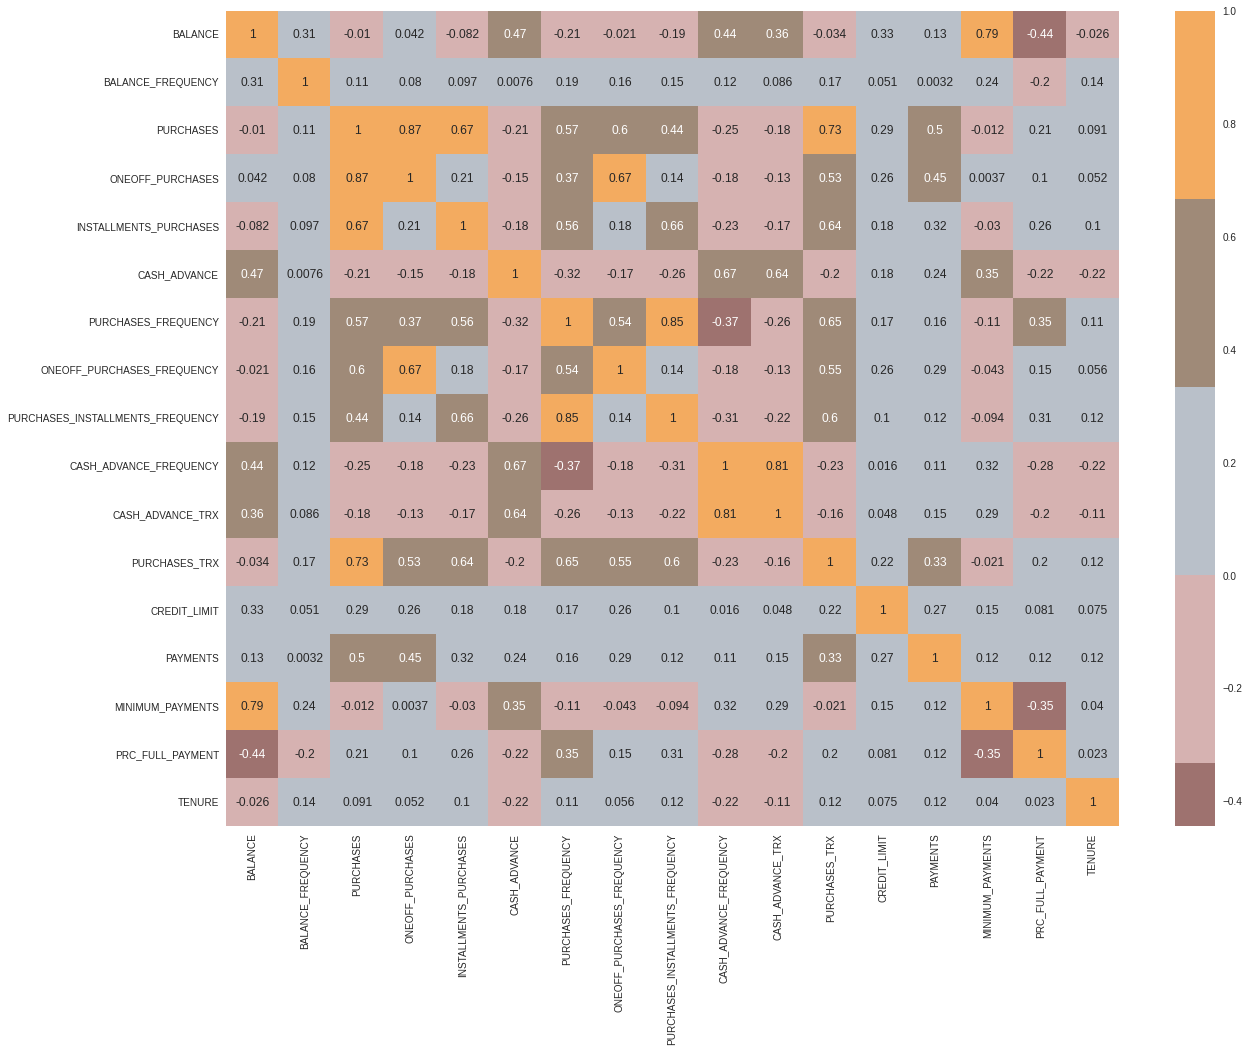

In [16]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,15))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

###6.2 SCALING

In [17]:
#Creating a copy of data
ds = df.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [18]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.349149,-0.122598,-0.718297,-0.553636,-0.585164,3.926873,-1.223506,-0.721659,-0.893432,0.571822,0.149067,-0.693869,1.121761,2.222399,1.106541,0.239702,0.329286
1,0.826297,0.453635,-0.076813,0.293027,-0.585164,-0.570903,1.276854,2.584225,-0.893432,-0.707339,-0.517072,-0.093228,1.316634,-0.590051,0.201248,-0.520975,0.329286
2,-0.413668,0.453635,-0.705022,-0.536116,-0.585164,-0.570903,-1.015143,-0.446170,-0.893432,-0.707339,-0.517072,-0.643816,-1.138765,-0.544589,-0.576788,-0.520975,0.329286
3,0.319707,0.453635,0.387899,-0.553636,1.579706,-0.570903,0.443401,-0.721659,0.590214,-0.707339,-0.517072,-0.293442,-0.904917,0.038528,3.821891,-0.520975,0.329286
4,0.329925,0.453635,-0.356390,-0.553636,0.123101,-0.570903,1.276854,-0.721659,1.649962,-0.707339,-0.517072,-0.093228,-0.710044,-0.543999,0.007497,-0.520975,0.329286


###6.3 DIMENSIONALLY REDUCTION

In [19]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,5930.0,-2.021921e-16,2.265465,-8.078150,-1.808529,-0.243651,1.360226,11.428085
col2,5930.0,-3.287608e-16,1.793017,-3.518893,-1.282708,-0.340375,0.955337,10.565499


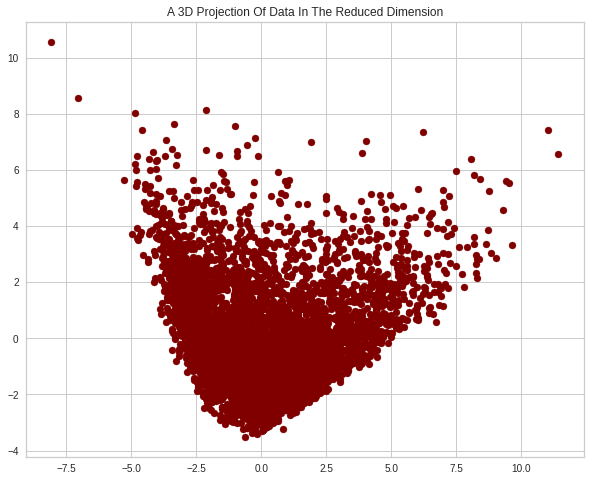

In [20]:
#A 2D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

#7. HYPERPARAMETER TUNING

In [21]:
# Spectral clustering
def train_kmeans(k,PCA_ds):
  kmeans_model = KMeans(n_clusters=k)
  y_pred = kmeans_model.fit_predict(PCA_ds)
  print("K-Means Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(PCA_ds,y_pred) )

# Spectral clustering
def train_spectral(k,PCA_ds):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(PCA_ds)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(PCA_ds,y_pred) )

# Agglomerative clustering
def train_Agglomerative(k,PCA_ds):
  agglo_model = AgglomerativeClustering(n_clusters=k)
  y_pred = agglo_model.fit_predict(PCA_ds)
  print("Agglomerative Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(PCA_ds,y_pred) )

###7.1 K-MEANS

Elbow Method to determine the number of clusters to be formed:


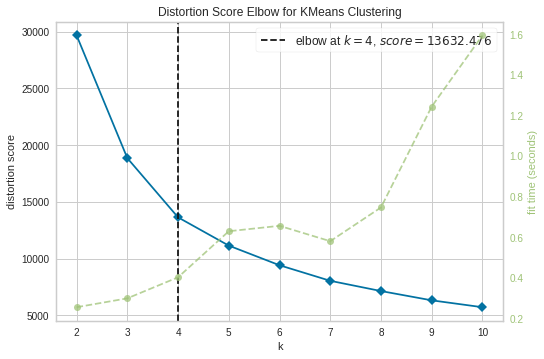

In [22]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [23]:
clusters=[3,4,5,6]
for i in clusters:
  train_kmeans(i,PCA_ds)

K-Means Clustering : clusters :  3  silhouette_score :  0.39849669621466266
K-Means Clustering : clusters :  4  silhouette_score :  0.39423350859270134
K-Means Clustering : clusters :  5  silhouette_score :  0.37520459647747895
K-Means Clustering : clusters :  6  silhouette_score :  0.3883333070819174


###7.2 SPECTRAL CLUSTERING

In [24]:
clusters=[3,4,5,6]
for i in clusters:
  train_spectral(i,PCA_ds)

Spectral Clustering : clusters :  3  silhouette_score :  0.5000991537144144
Spectral Clustering : clusters :  4  silhouette_score :  0.4678055402223003
Spectral Clustering : clusters :  5  silhouette_score :  0.40441728008714334
Spectral Clustering : clusters :  6  silhouette_score :  0.38356853906160404


###7.3 AGGLOMERATIVE CLUSTERING

In [25]:
# Agglomerative clustering
clusters=[3,4,5,6]
for i in clusters:
    train_Agglomerative(i,PCA_ds)

Agglomerative Clustering : clusters :  3  silhouette_score :  0.38510854684703316
Agglomerative Clustering : clusters :  4  silhouette_score :  0.3304249013844412
Agglomerative Clustering : clusters :  5  silhouette_score :  0.28136859536578773
Agglomerative Clustering : clusters :  6  silhouette_score :  0.27246631520590425


#8. BUILDING MODEL

*   Based on elbow jumlah cluster terbaik untuk K-Means adalah 4 tapi based on silhouette_score jumlah cluster terbaik adalah 3
*   Based on silhouette_score jumlah cluster terbaik untuk Spectral Clustering, Agglomerative Clustering dan Gaussian Mixture Clustering masing-masing adalah 3

Menurut saya untuk membandingkan mana model yang terbaik dalam melakukan clustering based on visualization using pca 2d, agak sedikit membingungkan dan tidak fair jika jumlah cluster yang ada di tiap model tidak sama.

Sehingga saya memutuskan untuk melakukan modeling per masing-masing algoritma kecuali DBSCAN menggunakan jumlah cluster sebanyak 3.

###8.1 K-MEANS CLUSTERING

In [26]:
#Initiating the Agglomerative Clustering model 
kmeans_model = KMeans(3)
# fit model and predict clusters
yhat_K3 = kmeans_model.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_K3
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_K3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



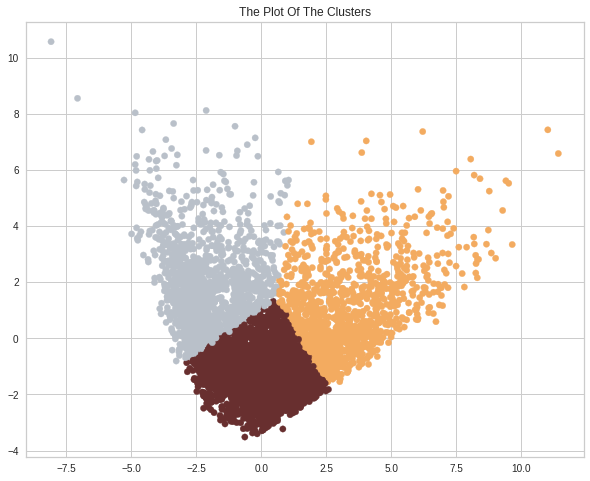

In [27]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

###8.2 SPECTRAL CLUSTERING

In [28]:
SC = SpectralClustering(n_clusters=3)
# fit model and predict clusters
yhat_SC3 = SC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_SC3
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_SC3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



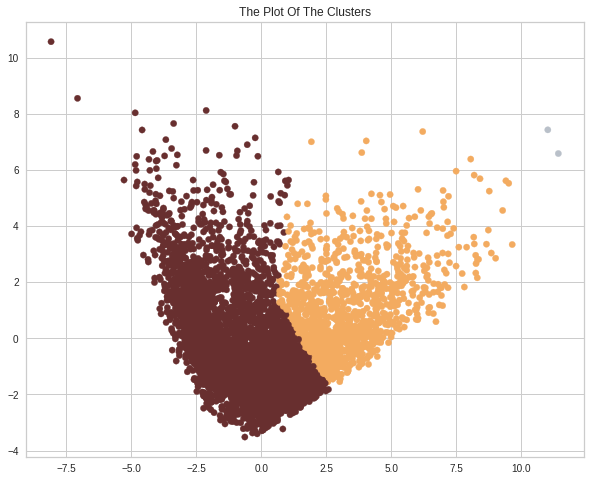

In [29]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

###8.3 AGGLOMERATIVE CLUSTERING

In [30]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC3 = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC3
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



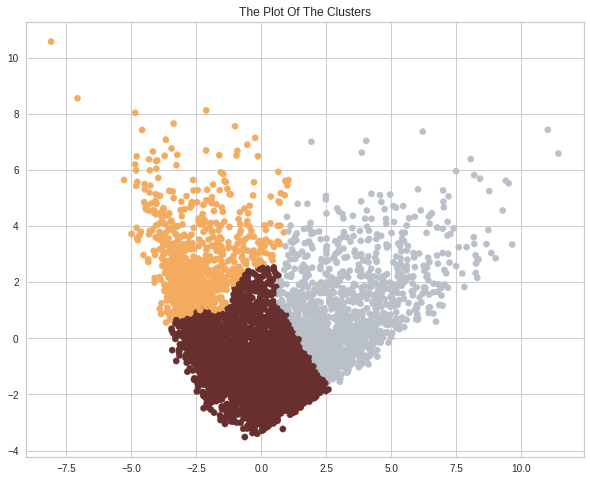

In [31]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

###8.4 DBSCAN

In [32]:
DB = DBSCAN(eps=1, min_samples=18)
# fit model and predict clusters
yhat_DB = DB.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_DB
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_DB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



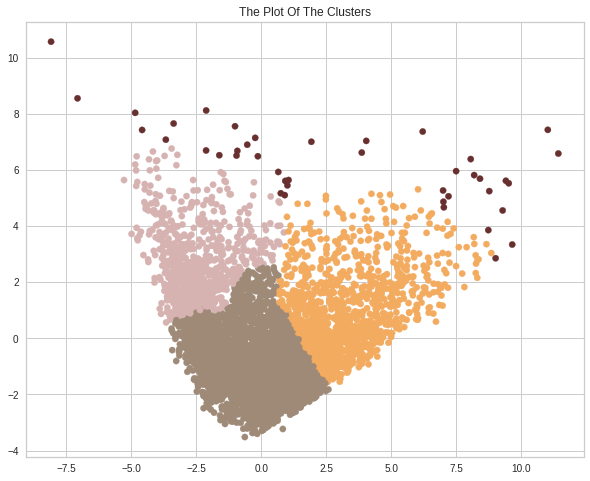

In [33]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Model dengan algoritma DBSCAN menggunakan jumlah cluster = 4 sehingga model ini tidak akan dipertimbangkan sebagai model terbaik, dikarenakan menurut saya tidak fair jika dibandingkan dengan model lain yang memiliki n cluster = 3

###8.6 SIMPAN MODEL TERBAIK

Based on personal asumption dari ke 4 algoritma yang sudah di build modelnya, model dengan visualisasi persebaran clustering terbaik adalah K-Means Clustering

In [34]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

#9. EVALUASI MODEL

Model terbaik adalah Gaussian Mixture clustering dan model terbaik akan digunakan untuk melakukan evaluasi model dan model inference.

In [35]:
df['Clusters'] = yhat_K3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



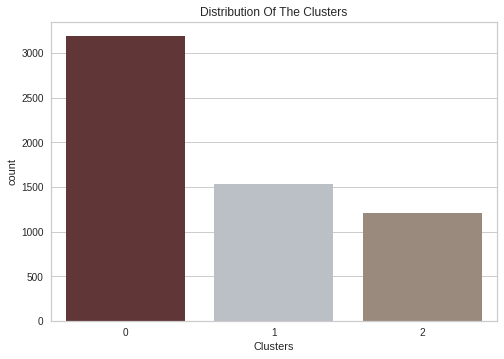

In [36]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

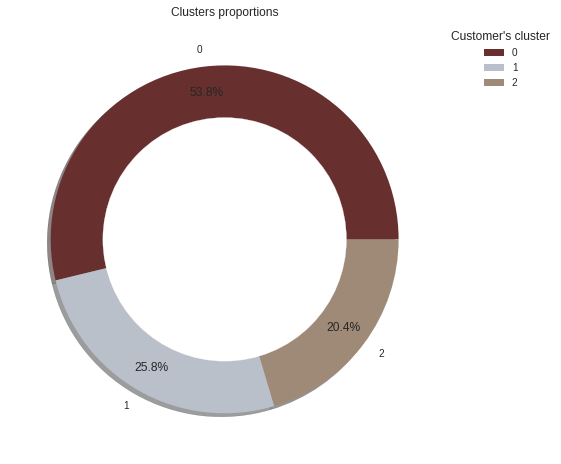

In [37]:
sizes = dict(df['Clusters'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors = pal)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Terlihat bahwa cluster 0 merupakan cluster dengan jumlah member terbanyak kemudian diikuti oleh cluster 1 dan cluster 2.

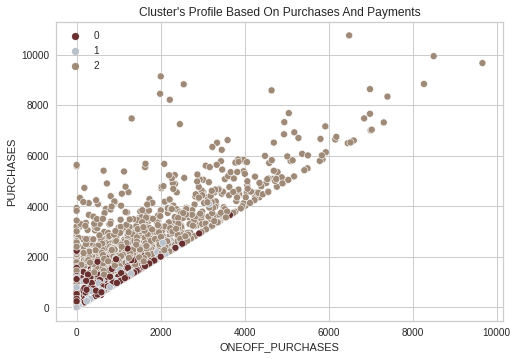

In [38]:
pl = sns.scatterplot(data = df,x=df["ONEOFF_PURCHASES"], y=df["PURCHASES"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Purchases And Payments")
plt.legend()
plt.show()

*   Cluster 0: average total purchases & average maximum purchases
*   Cluster 1: low total purchases & low maximum purchases
*   Cluster 2: high total purchases & high maximum purchases





/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



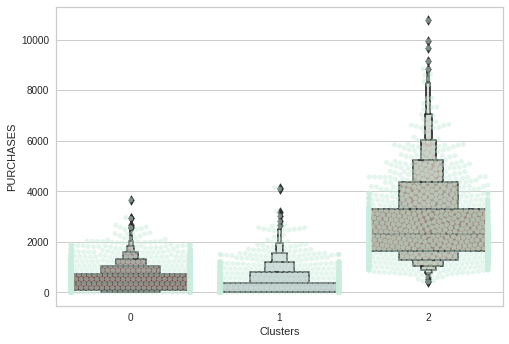

In [39]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["PURCHASES"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["PURCHASES"], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers.

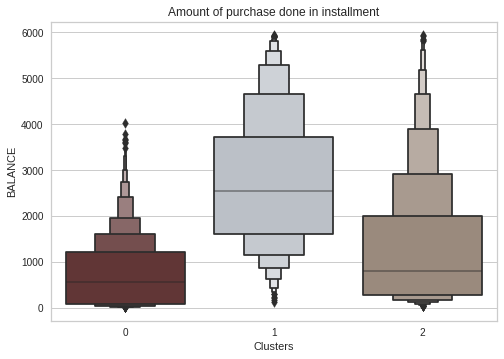

In [40]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["BALANCE"],x=df["Clusters"], palette= pal)
pl.set_title("Amount of purchase done in installment")
plt.show()

Cluster 1 merupakan member dengan High BALANCE diikuti oleh member cluster 2 dan cluster 0

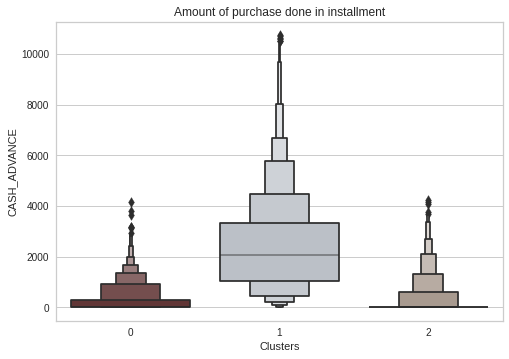

In [41]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["CASH_ADVANCE"],x=df["Clusters"], palette= pal)
pl.set_title("Amount of purchase done in installment")
plt.show()

Sejalan dengan hasil di atas, cluster 1 merupakan cluster yang sering membayar di muka sebelum tiba tanggal pelunasan. Kemudian diikuti oleh cluster 0 dan 2. Sehingga nyambung dengan hasil plot diatas, wajar jika cluster 1 memiliki BALANCE (saldo) yang paling banyak.

<Figure size 576x396 with 0 Axes>

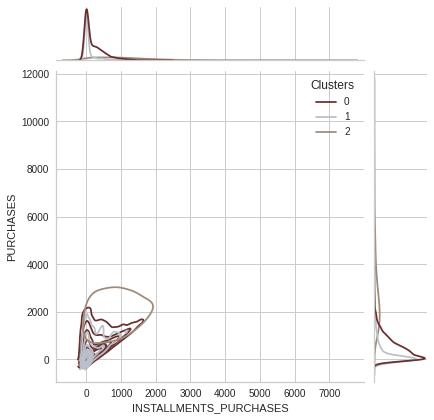

<Figure size 576x396 with 0 Axes>

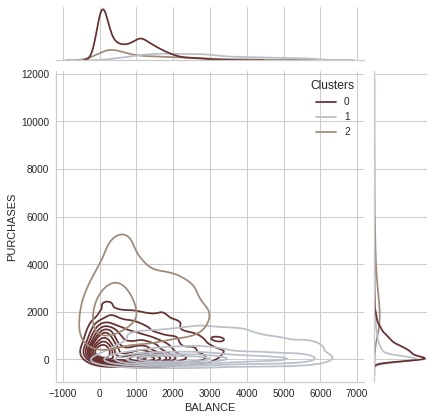

<Figure size 576x396 with 0 Axes>

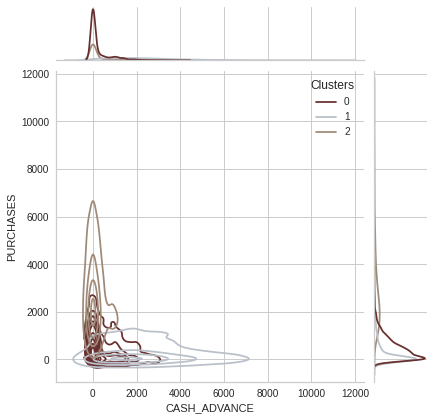

In [42]:
Personal = ["INSTALLMENTS_PURCHASES", "BALANCE", "CASH_ADVANCE"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["PURCHASES"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

#9. PROFILING

**Cluster 0: SILVER**

---
*   Memiliki average purchases, artinya sering mempunyai total pembelian di rentang rata-rata
*   Memiliki high installment_purchases, artinya sering melakukan pembelian yang dilakukan secara angsuran
*   Memiliki average balance, artinya memiliki jumlah saldo dalam rentang rata-rata
*   Memiliki average oneoff_purchases, artinya memiliki maksimum jumlah pembelian rata-rata dalam sekali jalan
*   Memiliki average cash_advance, artinya memiliki intensitas rata-rata dalam membayar uang muka sebelum tiba tanggal penagihan

**Cluster 1 : BRONZE**

---
*   Memiliki low purchases, artinya mempunyai total pembelian yang rendah
*   Memiliki low installment_purchases, artinya jarang melakukan pembelian dilakukan secara angsuran
*   Memiliki average balance, artinya memiliki jumlah saldo di rentang rata-rata
*   Memiliki low maximum oneoff_purchases, artinya memiliki maksimum jumlah pembelian yang rendah
*   Memiliki high cash_advance, artinya memiliki intensitas yang tinggi dalam membayar uang muka sebelum tiba tanggal penagihan

**Cluster 2 : GOLD**

---
*   Memiliki high purchases, artinya sering mempunyai total pembelian yang tinggi
*   Memiliki average installment_purchases, artinya memiliki intensitas rata-rata dalam melakukan pembelian yang dilakukan secara angsuran
*   Memiliki average balance, artinya memiliki jumlah saldo di rentang rata-rata
*   Memiliki high oneoff_purchases, artinya memiliki maksimum jumlah pembelian yang tinggi dalam sekali jalan
*   Memiliki low cash_advance, artinya memiliki intensitas yang rendah dalam membayar uang muka sebelum tiba tanggal penagihan

#10. MODEL INFERENCE

###10.1 PREPARING NEW DATA

In [43]:
from sklearn.utils import shuffle

In [44]:
df_inf = shuffle(ori_df)
df_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4661,C14788,1396.279238,1.000000,3380.44,1449.92,1930.52,0.000000,1.000000,0.333333,1.000000,0.000000,0,27,3500.0,5451.794841,385.003688,0.083333,12
7464,C17667,412.592491,0.545455,0.00,0.00,0.00,1852.218171,0.000000,0.000000,0.000000,0.250000,3,0,2500.0,3935.004997,394.904628,0.000000,12
5966,C16132,64.152423,0.818182,487.00,487.00,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,13,500.0,454.888506,127.731899,0.200000,12
2016,C12079,1780.299975,1.000000,1907.96,803.17,1104.79,727.608789,1.000000,0.583333,1.000000,0.333333,5,36,10000.0,2766.130640,391.624583,0.000000,12
928,C10961,6002.618198,1.000000,0.00,0.00,0.00,1163.462217,0.000000,0.000000,0.000000,0.500000,10,0,6500.0,1498.948148,1837.998855,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,C13714,1106.910402,1.000000,515.98,286.81,229.17,0.000000,0.500000,0.166667,0.416667,0.000000,0,7,12000.0,1867.692351,283.339719,0.000000,12
816,C10846,1841.359829,1.000000,2280.58,0.00,2280.58,0.000000,1.000000,0.000000,0.916667,0.000000,0,20,1800.0,2463.113969,1947.918485,0.000000,12
8609,C18843,398.453246,1.000000,0.00,0.00,0.00,647.778706,0.000000,0.000000,0.000000,0.857143,10,0,500.0,323.875395,110.678562,0.000000,7
6028,C16198,4507.000722,1.000000,7394.18,2288.20,5105.98,5424.701791,1.000000,0.916667,1.000000,0.833333,40,130,11000.0,10460.879460,1076.589500,0.000000,12


In [45]:
df_inf.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [46]:
rows_without_missing_data = df_inf.dropna()
df_inf = rows_without_missing_data

In [47]:
pred_data_scaled = pd.DataFrame(scaler.transform(df_inf),columns= df_inf.columns )
print("All features are now scaled")

All features are now scaled


In [48]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit_transform(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(pred_data_scaled), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8636.0,0.068448,2.872216,-15.885952,-1.778023,-0.299103,1.268779,39.913624
col2,8636.0,0.528949,3.549258,-3.898415,-1.552104,-0.392922,1.533971,61.899664


In [49]:
predict = kmeans_model.predict(PCA_ds)
predict

array([2, 0, 0, ..., 1, 2, 1], dtype=int32)

#11. KESIMPULAN

**Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan?**

---

*   Terdapat beberapa data dimana MINIMUM_PAYMENTS > PAYMENTS. Minimum pembayaran lebih dari total pembayaran bukanlah sesuatu hal yang wajar, sehingga karena hal tersebut, kedua fitur yang bersangkutan tidak saya gunakan dalam analisis cluster.
*   Dalam beberapa catatan rentang nilai BALANCE 1000 - 3000, jumlah BALANCE kartu kredit lebih besar dibandingkan dengan CREDIT_LIMIT. Namun hal ini bisa dijelaskan, mungkin karena beberapa orang membayar di muka sebelum tanggal penagihan datang untuk Kartu Kredit mereka. Hal ini membuat Saldo mereka melebihi Batas Kredit untuk jangka waktu tertentu.


**Berapa cluster yang berhasil kamu peroleh dari dataset tersebut? apakah sudah optimal? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.**

---

Based on silhouette score, jumlah cluster terbaik untuk kasus ini adalah sebanyak 3 cluster

**Bagaimana karakteristik dari masing-masing cluster? Bisakah kamu visualisasikan dan ceritakan?**

---

**Cluster 0: SILVER**

---
*   Memiliki average purchases, artinya sering mempunyai total pembelian di rentang rata-rata
*   Memiliki high installment_purchases, artinya sering melakukan pembelian yang dilakukan secara angsuran
*   Memiliki average balance, artinya memiliki jumlah saldo dalam rentang rata-rata
*   Memiliki average oneoff_purchases, artinya memiliki maksimum jumlah pembelian rata-rata dalam sekali jalan
*   Memiliki average cash_advance, artinya memiliki intensitas rata-rata dalam membayar uang muka sebelum tiba tanggal penagihan


---


**Cluster 1 : BRONZE**

---
*   Memiliki low purchases, artinya mempunyai total pembelian yang rendah
*   Memiliki low installment_purchases, artinya jarang melakukan pembelian dilakukan secara angsuran
*   Memiliki average balance, artinya memiliki jumlah saldo di rentang rata-rata
*   Memiliki low maximum oneoff_purchases, artinya memiliki maksimum jumlah pembelian yang rendah
*   Memiliki high cash_advance, artinya memiliki intensitas yang tinggi dalam membayar uang muka sebelum tiba tanggal penagihan

---

**Cluster 2 : GOLD**

---
*   Memiliki high purchases, artinya sering mempunyai total pembelian yang tinggi
*   Memiliki average installment_purchases, artinya memiliki intensitas rata-rata dalam melakukan pembelian yang dilakukan secara angsuran
*   Memiliki average balance, artinya memiliki jumlah saldo di rentang rata-rata
*   Memiliki high oneoff_purchases, artinya memiliki maksimum jumlah pembelian yang tinggi dalam sekali jalan
*   Memiliki low cash_advance, artinya memiliki intensitas yang rendah dalam membayar uang muka sebelum tiba tanggal penagihan

**Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh? coba ceritakan analisamu**

---
Terdapat kesamaan bahwa jumlah BALANCE kartu kredit lebih besar dibandingkan dengan CREDIT_LIMIT. Namun hal ini bisa dijelaskan, mungkin karena beberapa orang membayar di muka sebelum tanggal penagihan datang untuk Kartu Kredit mereka. Hal ini membuat Saldo mereka melebihi Batas Kredit untuk jangka waktu tertentu.

Dimana lebih diperjelas lagi mengenai **member** yang memiliki status saldo dan credit limit sesuai dengan jumlahnya, dengan clustering.

Cluster 1 merupakan member dengan High BALANCE diikuti oleh member cluster 2 dan cluster 0

Sejalan dengan hasil di atas, cluster 1 merupakan cluster yang sering membayar di muka sebelum tiba tanggal pelunasan. Kemudian diikuti oleh cluster 0 dan 2. Sehingga nyambung dengan hasil plot diatas, wajar jika cluster 1 memiliki BALANCE (saldo) yang paling banyak.